# [Give me some credit competition](https://www.kaggle.com/c/GiveMeSomeCredit/overview) - EDA & Data Cleaning
---

### Competition Intro : 
*Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.* 

*Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.*

*The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.*

*Historical data are provided on 250,000 borrowers.*

---
### Data Dictionary

`SeriousDlqin2yrs` : Person experienced 90 days past due delinquency or worse.

`RevolvingUtilizationOfUnsecuredLines` : Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.

`age` : Age of borrower in years.

`NumberOfTime30-59DaysPastDueNotWorse` : Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

`DebtRatio` : Monthly debt payments, alimony,living costs divided by monthy gross income.

`MonthlyIncome` : Monthly income.

`NumberOfOpenCreditLinesAndLoans` : Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).

`NumberOfTimes90DaysLate` : Number of times borrower has been 90 days or more past due.

`NumberRealEstateLoansOrLines` : Number of mortgage and real estate loans including home equity lines of credit.

`NumberOfTime60-89DaysPastDueNotWorse` : Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

`NumberOfDependents` : Number of dependents in family excluding themselves (spouse, children etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

%matplotlib inline

In [2]:
def plot_formatting():
    '''
    Set up the default plotting settings.
    '''
    
    plt.rc(
        'figure',
        figsize=(12,6),
        titleweight='bold',
        titlesize=25
    )
    plt.rc(
        'axes',
        labelweight='ultralight',
        titleweight='ultralight',
        titlelocation='left',
        titlecolor='k',
        titley=1.03,
        titlesize=16,
        grid=True
    )
    plt.rc(
        'axes.spines',
        right=False,
        left=False,
        top=False   
    )
    plt.rc(
        'grid',
        color='k',
        linestyle=(0,15,2,0),
        alpha=0.5
    )
    plt.rc('axes.grid', axis='y')
    plt.rc('ytick.major', width=0)
    plt.rc('font', family='monospace')
    
plot_formatting() # Setting our default settings

In [3]:
def key_figures(train, test):
    '''
    Display key figures of datasets
    '''
    
    fig, axes = plt.subplots(2,1, figsize=(5, 4))
    fig.subplots_adjust(hspace=1.2)
    test = test.drop('SeriousDlqin2yrs', axis=1)
    # Calculate key figures
    train_n = train.shape[0]
    test_n = test.shape[0]
    m = train.shape[1]-1
    train_total_cells = np.prod(train.shape)
    train_perc_nan = (train.isnull().sum().sum()) * 100 / train_total_cells
    test_total_cells = np.prod(test.shape)
    test_perc_nan = (test.isnull().sum().sum()) * 100 / test_total_cells
    perc_target = train['SeriousDlqin2yrs'].mean() * 100
    
    # Hide axis
    axes[0].axis('off')
    axes[1].axis('off')
    
    axes[0].set_title('- Training set key figures', x=-0.7)
    axes[1].set_title('- Test set key figures', x=-0.7)
    
    axes[0].text(0, 0.6, train_n, fontsize=18, fontweight="bold", color='seagreen', ha='center')
    axes[0].text(0, 0.01, 'borrowers in the dataset \n(training examples)',
                 fontsize=15, fontweight="bold", c='grey', ha='center')
    
    axes[1].text(0, 0.6, test_n, fontsize=18, fontweight="bold", color='tan', ha='center')
    axes[1].text(0, 0.01, 'borrowers in the dataset \n(test examples)',
                 fontsize=15, fontweight="bold", c='grey', ha='center')
    
    axes[0].text(0.75, 0.6, m, fontsize=18, fontweight="bold", color='seagreen', ha='center')
    axes[0].text(0.75, 0.1, 'features',fontsize=15, fontweight="bold", c='grey', ha='center')
    
    axes[0].text(1.5, 0.6, str(int(perc_target)) + '%', fontsize=18, fontweight="bold", color='seagreen', ha='center')
    axes[0].text(1.5, 0.01, 'of borrowers had serious \ndelinquency (target=1)',fontsize=15, fontweight="bold",
                 c='grey', ha='center')
    
    axes[0].text(2.25, 0.6, str(int(train_perc_nan)) + '%', fontsize=18, fontweight="bold", color='seagreen',
                 ha='center')
    axes[0].text(2.25, 0.1, 'of missing values',fontsize=15, fontweight="bold", c='grey', ha='center')
    
    axes[1].text(0.75, 0.6, str(int(test_perc_nan)) + '%', fontsize=18, fontweight="bold", color='tan', ha='center')
    axes[1].text(0.75, 0.01, 'of missing values',fontsize=15, fontweight="bold", c='grey', ha='center')

In [4]:
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')

In [5]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
train = train.drop('Unnamed: 0', axis=1)

In [7]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
test = test.drop('Unnamed: 0', axis=1)

## Key Figures

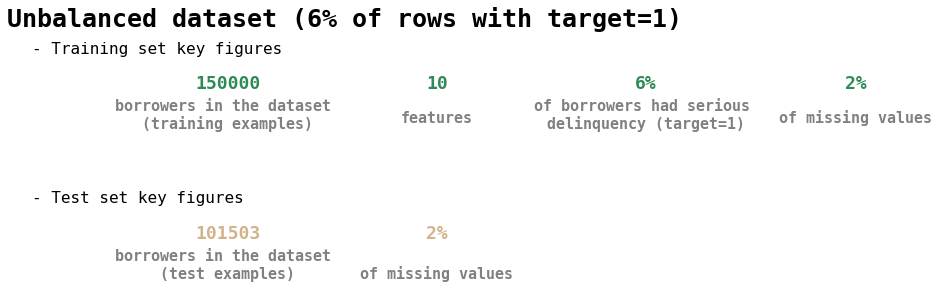

In [9]:
key_figures(train, test)
plt.suptitle('Unbalanced dataset (6% of rows with target=1)', x=0.45, y=1.07);

## dtype distribution

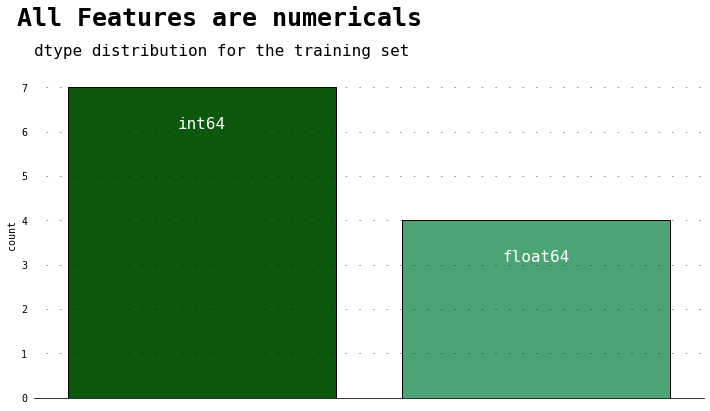

In [10]:
countplt = sns.countplot(x=train.dtypes.astype(str), palette=['darkgreen', 'mediumseagreen'],
              linewidth=1, edgecolor='black')

for i, p in enumerate(countplt.patches):
        countplt.annotate('{}'.format(plt.gca().get_xticklabels()[i].get_text()), (p.get_x()+0.4, p.get_height()-1),
                             ha='center', va='bottom', color= 'white', fontsize=16)
        
plt.tick_params(bottom=False, labelbottom=False)
plt.suptitle('All Features are numericals', x=0.34, y=1.03)
plt.title('dtype distribution for the training set');

In [11]:
train.select_dtypes('int64').describe().transpose()[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
SeriousDlqin2yrs,0.0,0.0,0.0,0.0,1.0
age,0.0,41.0,52.0,63.0,109.0
NumberOfTime30-59DaysPastDueNotWorse,0.0,0.0,0.0,0.0,98.0
NumberOfOpenCreditLinesAndLoans,0.0,5.0,8.0,11.0,58.0
NumberOfTimes90DaysLate,0.0,0.0,0.0,0.0,98.0
NumberRealEstateLoansOrLines,0.0,0.0,1.0,2.0,54.0
NumberOfTime60-89DaysPastDueNotWorse,0.0,0.0,0.0,0.0,98.0


- All integer features are **count features** as the only binary column is the target `SeriousDlqin2yrs`
- `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTimes90DaysLate` seem to be slightly sparse so in general people do not tend to have past due.
- `Age` has one or more outlier values as 0 is the minimum of the entries.

In [12]:
train.select_dtypes('float64').describe().transpose()[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,0.0,0.029867,0.154181,0.559046,50708.0
DebtRatio,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfDependents,0.0,0.000000,0.000000,1.000000,20.0


- `NumberOfDependents` is stored as a float feature but is normally an integer. There should be some outliers or missing values among its entries
- `DebtRatio` is a ratio, thus should be between 0 and 1, but the max value of entries for this column is 329664. Therefore, there are outliers present.

## Missing values per feature

In [13]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Distribution of each feature

In [14]:
def plot_distributions_discrete(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(train[feature], kde=True, label='Train',stat='density',
                 discrete=True, color='steelblue', alpha=0.6, ax=axes[0])
    sns.histplot(test[feature], kde=True, label='Test',stat='density',
                 discrete=True, color='gold', alpha=0.25, ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distr Train set vs Distr Test set')

    sns.boxplot(x='SeriousDlqin2yrs', y=feature, data=train, ax=axes[1], palette=['seagreen', 'tan'])
    
    X = train[[feature]].dropna()
    MI = mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], discrete_features=True,
                             random_state=0)
    axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))

    plt.suptitle('"{}" distributions'.format(feature), y=1.15);


In [15]:
def plot_distributions_continuous(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.kdeplot(train[feature].apply(np.log1p), label='Train',
                color='steelblue', alpha=0.5, shade=True, edgecolor='k', ax=axes[0])
    sns.kdeplot(test[feature].apply(np.log1p), label='Train',
                color='gold', alpha=0.3, shade=True, edgecolor='k', ax=axes[0])

    axes[0].legend()
    axes[0].set_title('Distr Train set vs Distr Test set')
    axes[0].set_xlabel('log-{}'.format(feature))

    sns.boxplot(x='SeriousDlqin2yrs', y=train[feature],
                data=train, ax=axes[1], palette=['seagreen', 'tan'])

    X = train[[feature]].dropna()
    MI = mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], random_state=0)
    axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))

    plt.suptitle('"{}" distributions'.format(feature), y=1.15);


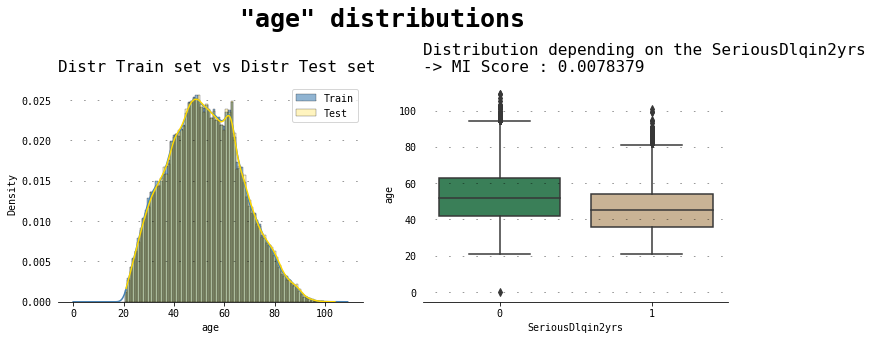

In [16]:
plot_distributions_discrete('age')

- Train and test sets have pretty much the same distributions for the feature `age` (The training histogram is blue and the test one is yellow, so when they overlap it appears green).
- Borrowers that experienced a Serious Delinquency seem to be a bit younger in general

In [17]:
train['age'] = train['age'].apply(lambda x: int(train['age'].median()) if x<18 else x)

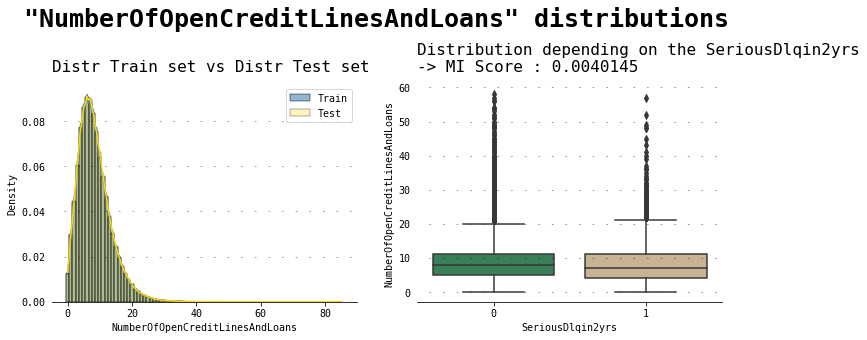

In [18]:
plot_distributions_discrete('NumberOfOpenCreditLinesAndLoans')

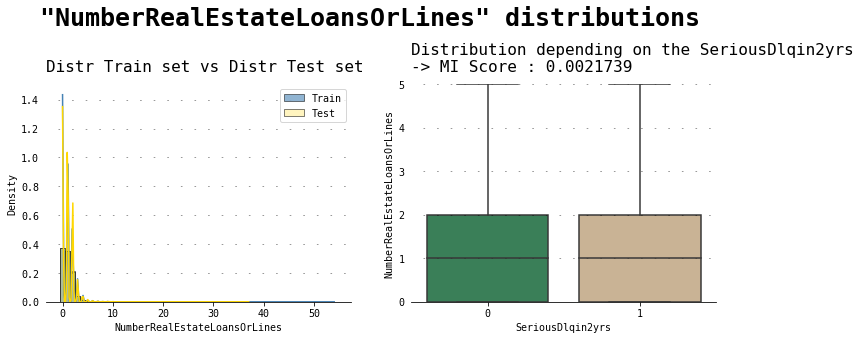

In [19]:
plot_distributions_discrete('NumberRealEstateLoansOrLines')
plt.gca().set_ylim(0, 5);

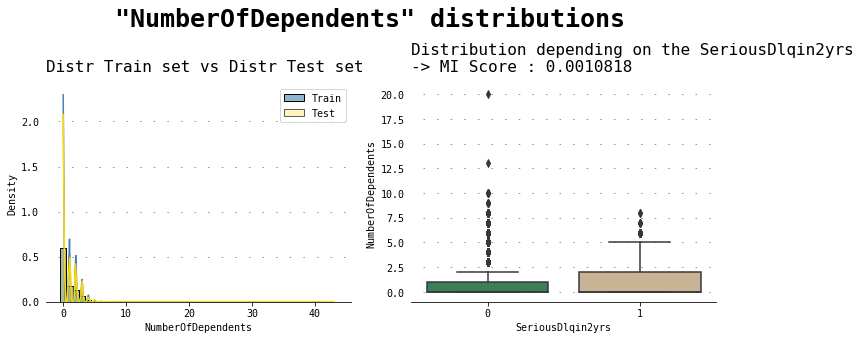

In [20]:
plot_distributions_discrete('NumberOfDependents')

In [21]:
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)
train['NumberOfDependents'] = train['NumberOfDependents'].astype('int64')

In [24]:
test['NumberOfDependents'].fillna(test['NumberOfDependents'].median(), inplace=True)
test['NumberOfDependents'] = test['NumberOfDependents'].astype('int64')

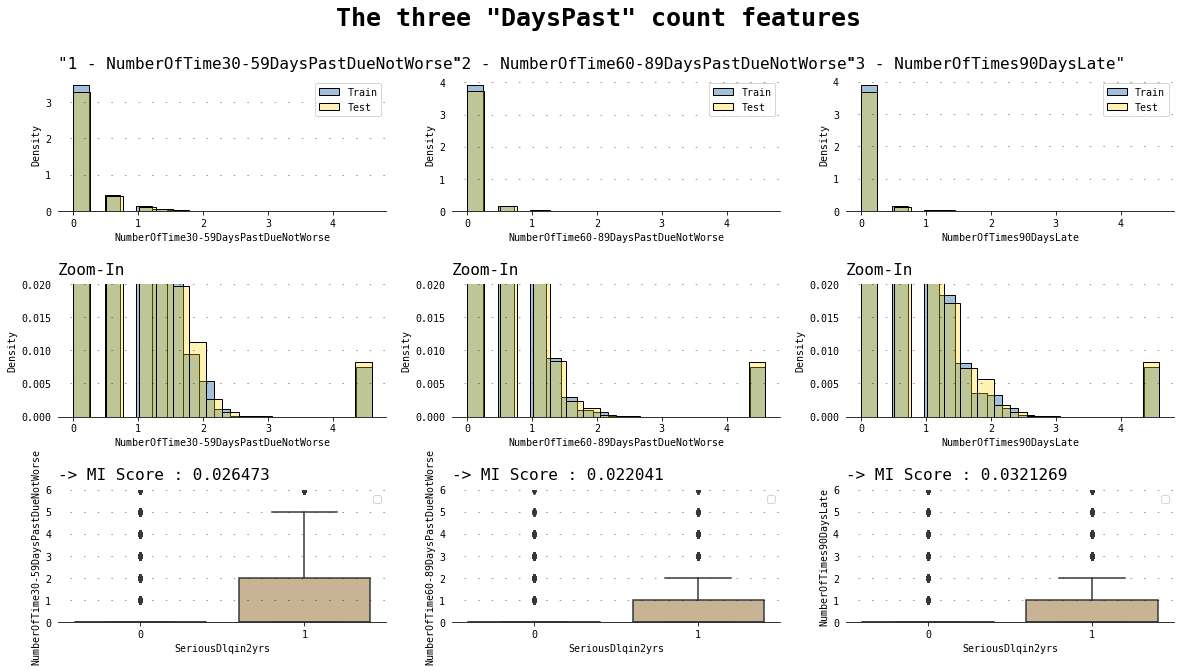

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.55)
for i, feature in enumerate(['NumberOfTime30-59DaysPastDueNotWorse',
                             'NumberOfTime60-89DaysPastDueNotWorse',
                             'NumberOfTimes90DaysLate']):
    
    sns.histplot(train[feature].apply(np.log1p), label='Train',stat='density',
                 color='steelblue', alpha=0.5, edgecolor='k', ax=axes[0][i])
    sns.histplot(test[feature].apply(np.log1p), label='Test',stat='density',
                 color='gold', alpha=0.3, edgecolor='k', ax=axes[0][i])
    sns.histplot(train[feature].apply(np.log1p), label='Train',stat='density',
                 color='steelblue', alpha=0.5, edgecolor='k', ax=axes[1][i])
    sns.histplot(test[feature].apply(np.log1p), label='Test',stat='density',
                 color='gold', alpha=0.3, edgecolor='k', ax=axes[1][i])

    sns.boxplot(x='SeriousDlqin2yrs', y=train[feature],
                data=train, ax=axes[2][i], palette=['seagreen', 'tan'])

    MI = mutual_info_classif(train[[feature]],
                             train['SeriousDlqin2yrs'], random_state=0, discrete_features=True)
    axes[0][i].set_title('"{} - {}"'.format(i+1,feature))
    axes[1][i].set_title('Zoom-In')
    axes[2][i].set_title('-> MI Score : ' + str(round(MI[0], 7)))
    axes[1][i].set_ylim(0, 0.02)
    axes[2][i].set_ylim(0, 6)
    axes[0][i].legend()
    axes[2][i].legend()

    
plt.suptitle('The three "DaysPast" count features');

The bar after x=4, for each of the three histograms (those labeled "Zoom-In"), appear to have the same height and to be distant from the other bars. The points in these areas might be outliers. As a logarithm function has been applied to Data on the x-axes to enable visualisation, we must find these potential outliers manually.

In [26]:
train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index(ascending=False)

98       264
96         5
13         1
12         2
11         1
10         4
9         12
8         25
7         54
6        140
5        342
4        747
3       1754
2       4598
1      16033
0     126018
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [27]:
train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index(ascending=False)

98       264
96         5
11         1
9          1
8          2
7          9
6         16
5         34
4        105
3        318
2       1118
1       5731
0     142396
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [28]:
train['NumberOfTimes90DaysLate'].value_counts().sort_index(ascending=False)

98       264
96         5
17         1
15         2
14         2
13         4
12         2
11         5
10         8
9         19
8         21
7         38
6         80
5        131
4        291
3        667
2       1555
1       5243
0     141662
Name: NumberOfTimes90DaysLate, dtype: int64

These points seem to be **96** and **98**. They show up 269 times in total in each "NumberPastDue" feature

In [29]:
train[train['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate',
                                               'NumberOfTime30-59DaysPastDueNotWorse',
                                               'NumberOfTime60-89DaysPastDueNotWorse']]

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
2286,98,98,98
3884,98,98,98
4417,98,98,98
4705,98,98,98
...,...,...,...
147774,98,98,98
149153,98,98,98
149239,98,98,98
149439,98,98,98


In [30]:
train[train['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate',
                                               'NumberOfTime30-59DaysPastDueNotWorse',
                                               'NumberOfTime60-89DaysPastDueNotWorse']].drop_duplicates()

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
41944,96,96,96


They are definitely outliers. Once one of the three features has one of these two values, the other features get the same outlier value.

In [31]:
train[train['NumberOfTimes90DaysLate'] >= 96]['NumberOfOpenCreditLinesAndLoans'].value_counts()

0    267
1      2
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [32]:
train[train['NumberOfTimes90DaysLate'] >= 96]['NumberRealEstateLoansOrLines'].value_counts()

0    269
Name: NumberRealEstateLoansOrLines, dtype: int64

### Cleaning of 'PastDue' features 

In [33]:
mask = (train['NumberOfOpenCreditLinesAndLoans'] == 0) & (train['NumberRealEstateLoansOrLines'] == 0)

train['NumberOfTimes90DaysLate'] = (
    
    train['NumberOfTimes90DaysLate']
    .apply(lambda x: int(train[mask]['NumberOfTimes90DaysLate'].median()) if x >= 96 else x)
    
)

In [34]:
test[test['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate',
                                             'NumberOfTime30-59DaysPastDueNotWorse',
                                             'NumberOfTime60-89DaysPastDueNotWorse']].drop_duplicates()

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
9,98,98,98
14534,96,96,96


In [35]:
masktest = (test['NumberOfOpenCreditLinesAndLoans'] == 0) & (test['NumberRealEstateLoansOrLines'] == 0)

test['NumberOfTimes90DaysLate'] = (
    
    test['NumberOfTimes90DaysLate']
    .apply(lambda x: int(test[masktest]['NumberOfTimes90DaysLate'].median()) if x >= 96 else x)
    
)


train['NumberOfTime30-59DaysPastDueNotWorse'] = (
    
    train['NumberOfTime30-59DaysPastDueNotWorse']
    .apply(lambda x: int(train[mask]['NumberOfTime30-59DaysPastDueNotWorse'].median()) if x >= 96 else x)
    
)

test['NumberOfTime30-59DaysPastDueNotWorse'] = (
    
    test['NumberOfTime30-59DaysPastDueNotWorse']
    .apply(lambda x: int(test[masktest]['NumberOfTime30-59DaysPastDueNotWorse'].median()) if x >= 96 else x)
    
)


train['NumberOfTime60-89DaysPastDueNotWorse'] = (
    
    train['NumberOfTime60-89DaysPastDueNotWorse']
    .apply(lambda x: int(train[mask]['NumberOfTime60-89DaysPastDueNotWorse'].median()) if x >= 96 else x)
    
)

test['NumberOfTime60-89DaysPastDueNotWorse'] = (
    
    test['NumberOfTime60-89DaysPastDueNotWorse']
    .apply(lambda x: int(test[masktest]['NumberOfTime60-89DaysPastDueNotWorse'].median()) if x >= 96 else x)
    
)

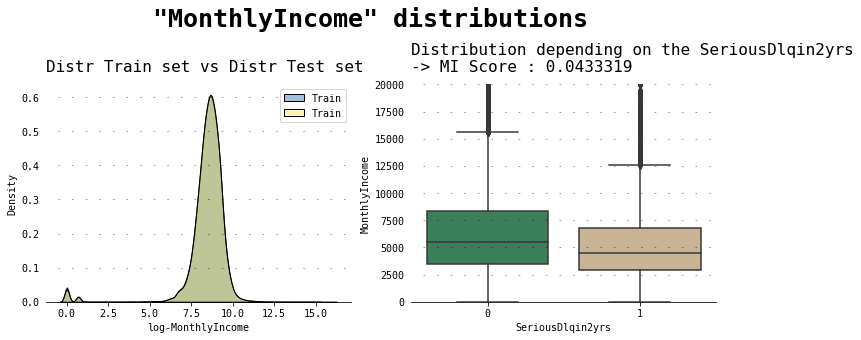

In [36]:
_, axes = plt.subplots(1, 2, figsize=(12,4))
sns.kdeplot(train['MonthlyIncome'].apply(np.log1p), label='Train',
            color='steelblue', alpha=0.5, shade=True, edgecolor='k', ax=axes[0])
sns.kdeplot(test['MonthlyIncome'].apply(np.log1p), label='Train',
            color='gold', alpha=0.3, shade=True, edgecolor='k', ax=axes[0])

axes[0].legend()
axes[0].set_title('Distr Train set vs Distr Test set')
axes[0].set_xlabel('log-{}'.format('MonthlyIncome'))

sns.boxplot(x='SeriousDlqin2yrs', y=train['MonthlyIncome'],
            data=train, ax=axes[1], palette=['seagreen', 'tan'])
axes[1].set_ylim(0, 20000)
X = train[['MonthlyIncome']].dropna()
MI = mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], random_state=0, discrete_features=True)
axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))

plt.suptitle('"{}" distributions'.format('MonthlyIncome'), y=1.15);

In [37]:
train[['MonthlyIncome']].isnull().mean()

MonthlyIncome    0.198207
dtype: float64

About 20% of entries in `MonthlyIncome` are misssing. We will impute them later

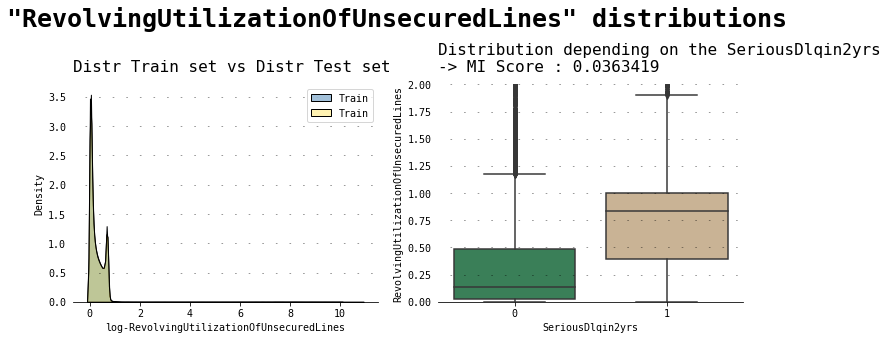

In [38]:
plot_distributions_continuous('RevolvingUtilizationOfUnsecuredLines')
plt.gca().set_ylim(0, 2);

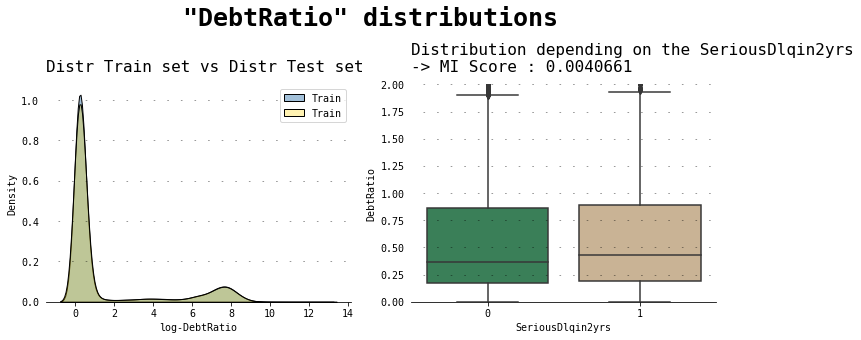

In [39]:
plot_distributions_continuous('DebtRatio')
plt.gca().set_ylim(0, 2);

In [40]:
train['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

`DebtRatio` should be between 0 and 1, as it is a ratio. However, we can see with the descriptive statistics that the maximum entry of this feature is 329664. Let's see the amount of entries that have a DebtRatio greater than 1.

In [41]:
(train['DebtRatio'] > 1).mean()

0.23424666666666666

**23%** of entries in `DebtRatio` has a value greater than 1µ

In [42]:
(test['DebtRatio'] > 1).mean()

0.23228870082657654

Same for the test dataset

Let's see how many monthly incomes are missing for this kind of DebtRatio

In [43]:
print('Training set----------\n')
print('Missing Income for debt > 1: ', train[train['DebtRatio'] > 1]['MonthlyIncome'].isnull().mean())
print('Missing Income in the entire dataset: ', train['MonthlyIncome'].isnull().sum())
print('Percentage of Missing Income that have a debt > 1 : ',
      (train[train['DebtRatio'] > 1]['MonthlyIncome'].isnull().sum()) / (train['MonthlyIncome'].isnull().sum()))

Training set----------

Missing Income for debt > 1:  0.7941486182656459
Missing Income in the entire dataset:  29731
Percentage of Missing Income that have a debt > 1 :  0.9385489892704585


So 93% of rows with missing `MonthlyIncome` have a `debtRatio` greater than 1.

In [44]:
train[(train['DebtRatio'] > 1) & (train['MonthlyIncome'].isnull())]['DebtRatio'].describe()

count     27904.000000
mean       1782.953985
std        4362.924654
min           2.000000
25%         279.750000
50%        1295.000000
75%        2478.000000
max      329664.000000
Name: DebtRatio, dtype: float64

In [45]:
print('Test set----------\n')
print('Missing Income for debt > 1: ', test[test['DebtRatio'] > 1]['MonthlyIncome'].isnull().mean())
print('Missing Income in the entire dataset: ', test['MonthlyIncome'].isnull().sum())
print('Percentage of Missing Income that have a debt > 1 : ',
      (test[test['DebtRatio'] > 1]['MonthlyIncome'].isnull().sum()) / (test['MonthlyIncome'].isnull().sum()))

Test set----------

Missing Income for debt > 1:  0.7994316735940283
Missing Income in the entire dataset:  20103
Percentage of Missing Income that have a debt > 1 :  0.937621250559618


It seems that due to borrowers' Incomes not being known, the DebtRatio can not be otbained (As it is the result of the raw Debt by the Income). The DebtRatio values in these rows seem therefore to be the raw Debt of the borrowers.

What about the DebtRatio of borrowers with missing Income but whose DebtRatio is <1?

In [46]:
# DebtRatio values of rows that have missing Income but debtRatio < 1
train[(train['MonthlyIncome'].isnull()) & (train['DebtRatio'] < 1)]['DebtRatio'].value_counts()

0.0    1622
Name: DebtRatio, dtype: int64

In [47]:
# DebtRatio values of rows that have missing Income but debtRatio < 1
test[(test['MonthlyIncome'].isnull()) & (test['DebtRatio'] < 1)]['DebtRatio'].value_counts()

0.0    1123
Name: DebtRatio, dtype: int64

All rows with missing `MonthlyIncome` have incorrect `DebtRatio`, either greater than 1 or equal to 0.

From these last findings, a DebtRatio > 1 might actually be the Debt value. As the income is missing, the DebtRatio cell keeps the Debt value as entry in this case. Rows with a DebtRatio = 0 and a missing Income might have these issues because there were neither a Debt value nor an Income value present.

However, within the rows with DebtRatio > 1, there were some with non-null Income. 

In [48]:
train[(train['DebtRatio'] > 1) & (train['MonthlyIncome'].notnull())]['DebtRatio'].describe()

count     7233.000000
mean       437.495836
std       1678.184932
min          1.000500
25%          1.217111
50%          1.748804
75%         47.000000
max      61106.500000
Name: DebtRatio, dtype: float64

In [49]:
train[(train['DebtRatio'] > 1) & (train['MonthlyIncome'].notnull())]['MonthlyIncome'].describe()

count     7233.000000
mean      2258.955067
std       2831.168204
min          0.000000
25%          1.000000
50%       1577.000000
75%       3333.000000
max      70000.000000
Name: MonthlyIncome, dtype: float64

In [50]:
train[(train['DebtRatio'] > 1) & (train['MonthlyIncome'].notnull())][['DebtRatio', 'MonthlyIncome']]

,DebtRatio,MonthlyIncome
14,477.000000,0.0
25,1.595253,4676.0
44,1687.500000,1.0
50,3095.000000,0.0
63,1.051398,3326.0
...,...,...
149841,1.061506,11250.0
149882,714.500000,1.0
149907,1.124589,9125.0
149950,1940.000000,0.0


There seems to be rows with 0 and 1 as Income, and those also have a DebtRatio that behaves as the Debt instead.
Where the monthly Income is "normal", the DebtRatio is very close to 1 (but still an outlier)

The following lines of code show this:

In [1]:
print('Incorrect MonthlyIncome and DebtRatio > 1\n-----------')
train[(train['DebtRatio'] > 1) & (train['MonthlyIncome'] <= 1)]['DebtRatio'].describe()

Incorrect MonthlyIncome and DebtRatio > 1
-----------


NameError: name 'train' is not defined

In [52]:
print('Correct MonthlyIncome and DebtRatio > 1\n-----------')
train[(train['DebtRatio'] > 1) & (train['MonthlyIncome'] > 1)]['DebtRatio'].describe()

Normal MonthlyIncome and DebtRatio > 1
-----------


count    5154.000000
mean        2.845922
std        12.920010
min         1.000500
25%         1.139829
50%         1.365954
75%         1.950194
max       450.333333
Name: DebtRatio, dtype: float64

### Observations on `DebtRatio` and `MonthlyIncome` columns:
----
- When the `MonthlyIncome` is missing, `DebtRatio` acquires an abnormal value, **which is either =0 or > 1**

    - Whereby the DebtRatio is greater than 1, **it might represent the raw Debt value**. As the Income is unknown, the DebtRatio can't be obtained from the Debt and the cell keeps the original Debt value. If we impute those missing Incomes with proper values, we would be able to subsequently obtain proper DebtRatio values.
    - Whereby the DebtRatio is 0, it might be because **even the raw Debt value was unknown**. We will change those entries and impute them with the median of Debt Values.
    
- Nevertheless, some rows with incorrect `DebtRatio` values have Income information

    - There are cases where the Income is either 0 or 1. In this case, the DebtRatio still behaves like the Debt. We'll put NaN to these Income values instead and join them with the previously discovered missing incomes.
    - When the MonthlyIncome is "normal", the DebtRatio is very close to 1.0. Nothing can be interpreted from this, so we will just change those DebtRatio entries and bring them all to a 0-1 scale.

### Cleaning of `DebtRatio` and `MonthlyIncome`

#### Baseline Mutual Information score of `DebtRatio` with `SeriousDlqin2yrs`

In [53]:
X = train.copy()

mutual_info_classif(X[['DebtRatio']], train['SeriousDlqin2yrs'], random_state=0)[0]

0.004066052336416659

In [54]:
# Impute DebtRatio that are >1 but have correct Income entries

train['DebtRatio'] = train.apply(lambda x: train['DebtRatio'].median() if ((x['DebtRatio'] > 1) & (x['MonthlyIncome'] > 1)) else x['DebtRatio'], axis=1)
test['DebtRatio'] = test.apply(lambda x: test['DebtRatio'].median() if ((x['DebtRatio'] > 1) & (x['MonthlyIncome'] > 1)) else x['DebtRatio'], axis=1)

mutual_info_classif(train[['DebtRatio']], train['SeriousDlqin2yrs'], random_state=0)[0]

0.004217289221362552

In [55]:
(train['DebtRatio'] == 0).sum()

4113

In [57]:
# Put NaN to zero DebtRatio entries when the Income of the row is missing

train['DebtRatio'] = train.apply(lambda x: np.nan if ((x['DebtRatio'] == 0) & (pd.isna(x['MonthlyIncome']))) else x['DebtRatio'], axis=1)
test['DebtRatio'] = test.apply(lambda x: np.nan if ((x['DebtRatio'] == 0) & (pd.isna(x['MonthlyIncome']))) else x['DebtRatio'], axis=1)

In [58]:
X = train[['DebtRatio']].dropna().copy()
mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], random_state=0)[0]

0.004247660280994658

In [59]:
# Baseline MI score of the MonthlyIncome  with SeriousDlqin2yrs

X = train.copy()

X = X[['MonthlyIncome']].dropna()

mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], discrete_features=True, random_state=0)[0]

0.0433319366802622

In [60]:
# Impute NaN to Income with values equal to 0 or 1

train['MonthlyIncome'] = train.where(train['MonthlyIncome']>1)['MonthlyIncome']
test['MonthlyIncome'] = test.where(test['MonthlyIncome']>1)['MonthlyIncome']

In [61]:
# Let's see how this has increased the score
X = train[['MonthlyIncome']].dropna().copy()
mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], discrete_features=True, random_state=0)[0]

0.04395897449589204

In [62]:
train['Debt'] = train.apply(lambda x: x['DebtRatio'] * x['MonthlyIncome'] if pd.isna(x['MonthlyIncome'])==False else x['DebtRatio'],
                            axis=1)
test['Debt'] = test.apply(lambda x: x['DebtRatio'] * x['MonthlyIncome'] if pd.isna(x['MonthlyIncome'])==False else x['DebtRatio'],
                          axis=1)

In [63]:
train['Debt']

0         7323.197016
1          316.878123
2          258.914887
3          118.963951
4         1584.975094
             ...     
149995     472.774869
149996    4001.283436
149997    3870.000000
149998       0.000000
149999    2038.750092
Name: Debt, Length: 150000, dtype: float64

In [64]:
train['Debt'].isnull().sum()

1622

Null entries here come from the `DebtRatio` cells we impute NaN to. We will impute these NaNs in Debt with particular values, then we will impute NaNs in `MonthlyIncome` and finally divide Debt by `MonthlyIncome` to get a new correct `DebtRatio` column.

In [65]:
# Baseline Score
X = train[['Debt']].dropna().copy()

mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], random_state=0)[0]

0.00427793587304226

In [66]:
grouping = (train.groupby(['NumberRealEstateLoansOrLines', 'NumberOfOpenCreditLinesAndLoans'])
            .mean()['Debt']
           )

dict_debt = grouping[0].to_dict()

In [67]:
train['Debt'] = train.apply(lambda x: dict_debt[x['NumberOfOpenCreditLinesAndLoans']] if pd.isna(x['Debt']) else x['Debt'],
                          axis=1)
test['Debt'] = test.apply(lambda x: dict_debt[x['NumberOfOpenCreditLinesAndLoans']] if pd.isna(x['Debt']) else x['Debt'],
                          axis=1)

In [68]:
mutual_info_classif(train[['Debt']], train['SeriousDlqin2yrs'], random_state=0)[0]

0.0050676947370891234

In [69]:
X = train.copy()

X = X[['MonthlyIncome']].dropna()

mutual_info_classif(X, train.loc[X.index, 'SeriousDlqin2yrs'], discrete_features=True, random_state=0)[0]

0.04395897449589204

In [70]:
X = pd.concat([train, test], axis=0).copy()

X['Quantile_Debt'] = pd.qcut(X.Debt, q=40000, duplicates='drop')

X[['Quantile_Debt']]

,Quantile_Debt
0,"(7321.5296502, 7323.367125]"
1,"(316.8767208, 316.8897816]"
2,"(258.9007885, 258.9181521]"
3,"(118.9615797, 118.9656248]"
4,"(1584.8603869, 1585.0]"
...,...
101498,"(95.9247871, 95.952024]"
101499,"(7113.9017591, 7117.2248636]"
101500,"(835.9826433, 836.0]"
101501,"(3567.7065853, 3568.0]"


In [71]:
grouping = X.groupby('Quantile_Debt').mean()[['MonthlyIncome']].fillna(method='ffill')
grouping

,MonthlyIncome
Quantile_Debt,
"(-1e-07, 0.5]",4394.895557
"(0.5, 0.7285194]",2.000000
"(0.7285194, 0.7330157]",2.000000
"(0.7330157, 0.8842825]",5.000000
"(0.8842825, 0.9973058]",216.666667
...,...
"(37451.24975, 40345.0695814]",148834.333333
"(40345.0695814, 49226.2752]",80500.000000
"(49226.2752, 72931.4554003]",324000.000000


In [72]:
grouping = grouping['MonthlyIncome'].to_dict()

In [73]:
copy_train = train.copy()
copy_test = test.copy()
copy_train = copy_train.join(X['Quantile_Debt'].iloc[:len(train)])
copy_test = copy_test.join(X['Quantile_Debt'].iloc[len(train):len(train) + len(test)])


train['MonthlyIncome'] = copy_train.apply(lambda x: grouping[x['Quantile_Debt']] if pd.isna(x['MonthlyIncome']) else x['MonthlyIncome'],
                                          axis=1).astype('int64')
test['MonthlyIncome'] = copy_test.apply(lambda x: grouping[x['Quantile_Debt']] if pd.isna(x['MonthlyIncome']) else x['MonthlyIncome'],
                                          axis=1).astype('int64')

In [74]:
mutual_info_classif(train[['MonthlyIncome']], train['SeriousDlqin2yrs'], discrete_features=True, random_state=0)[0]

0.04397895668367055

In [75]:
train['DebtRatio'] = train.apply(lambda x: x['Debt'] / x['MonthlyIncome'], axis=1)

train['DebtRatio'] = train['DebtRatio'].apply(lambda x: 0.99 if x>1 else x)

test['DebtRatio'] = test.apply(lambda x: x['Debt'] / x['MonthlyIncome'], axis=1)

test['DebtRatio'] = test['DebtRatio'].apply(lambda x: 0.99 if x>1 else x)

In [76]:
mutual_info_classif(train[['DebtRatio']], train['SeriousDlqin2yrs'], random_state=0)[0]

0.005243250684532574

### MI Final Scores & Correlation Matrix

In [78]:
def make_mi_scores(X, y):
    X = X.copy()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

In [79]:
mi_scores = make_mi_scores(train.drop('SeriousDlqin2yrs', axis=1), train['SeriousDlqin2yrs'])

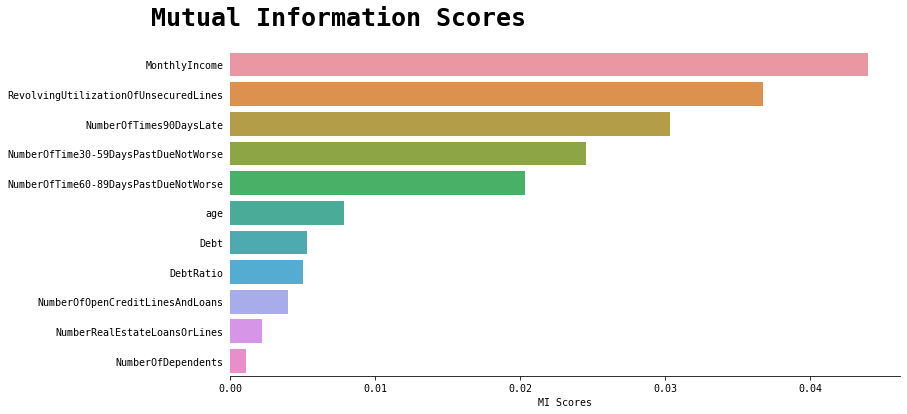

In [80]:
mi_scores = mi_scores.sort_values(ascending=False)
sns.barplot(x=mi_scores, y=mi_scores.index, orient='h')
plt.suptitle("Mutual Information Scores", x=0.25);

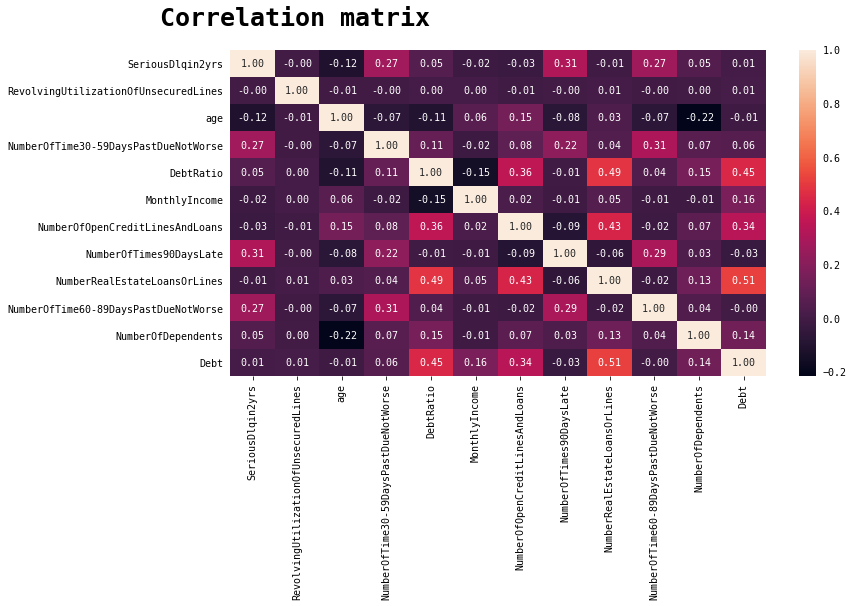

In [81]:
sns.heatmap(train.corr(), annot=True, fmt='.2f')
plt.suptitle('Correlation matrix', x=0.2);

In [82]:
# train.to_csv('Cleaned_train.csv', index=False)
# test.to_csv('Cleaned_test.csv', index=False)